2
Sample of Positive Posts
['Netflix Makes $100 Million Fund to Help Creatives Affected by Coronavirus', 'The GoFundMe campaign to raise money for New York movie theater workers who have been laid off or furloughed due to the coronavirus pandemic has reached its goal, the Cinema Workers Solidarity Fund announces.', 'Cinematographers Guild To Offer Dues Relief During Coronavirus Shutdown', 'The Adjusted For Inflation Box Office of some films can be really interesting', 'Cinematographers Guild Offering Dues Relief And Assistance To Members During Coronavirus Shutdown']
Sample of Negative Posts
['‘Wonder Woman 1984’ Release Pushed Until August, ‘In the Heights’ Postponed Due to Coronavirus Pandemic', 'Amazon Prime Video, Apple TV Plus Degrading Video Quality to Ease European Bandwidth Strain Amid Coronavirus Emergency', "Mark Blum, Star of 'Desperately Seeking Susan, 'Crocodile Dundee', 'St Elsewhere', and 'You,' Dies at 69 Due to Coronavirus Complications", "Ethan Hawke Imagines a Fourth

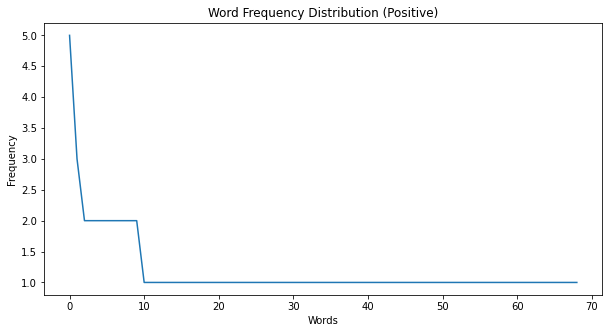

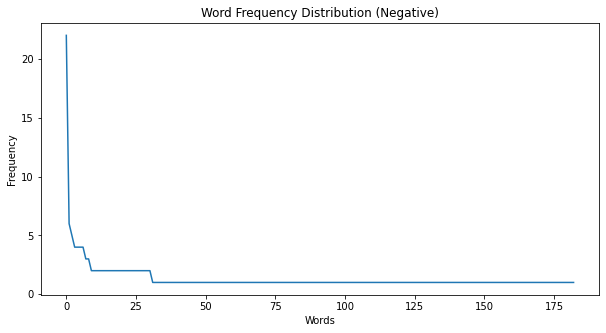

In [52]:
import nltk
import numpy

# nltk.download()

import config
import pandas as pd
import praw
import datetime as dt
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns


reddit = praw.Reddit(
    client_id=config.PERSONAL_USE_SCRIPT_14_CHARS,
    client_secret=config.SECRET_KEY_27_CHARS,
    user_agent=config.YOUR_APP_NAME,
    username=config.YOUR_REDDIT_USER_NAME,
    password=config.YOUR_REDDIT_LOGON_PASSWORD,
)

# pulling a sample of posts
posts = {"title": [], "created": []}

subreddit = "movies"
keyword = "coronavirus"

for submission in reddit.subreddit(subreddit).search(
    keyword, sort="top", time_filter="week", limit=None
):
    posts["title"].append(submission.title)
    posts["created"].append(submission.created)
    display.clear_output()
    print(len(posts))


from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pprint

sia = SIA()
results = []

for line in posts["title"]:
    pol_score = sia.polarity_scores(line)
    pol_score["Post"] = line
    results.append(pol_score)


# print(results)

df = pd.DataFrame.from_records(results)
# df.head()

# labelling dataset
df["label"] = 0
df.loc[df["compound"] >= 0.2, "label"] = 1
df.loc[df["compound"] < 0.2, "label"] = -1
# print(df.head())

# printing sample of positive posts
print("Sample of Positive Posts")
print(list(df[df["label"] == 1].Post)[:5])

# printing sample of negative posts
print("Sample of Negative Posts")
print(list(df[df["label"] == -1].Post)[:5])

# Word Distributions
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r"\w+")
stop_words = stopwords.words("english")


def process_text(posts):
    tokens = []
    for line in posts:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)

    return tokens


# Positive Words

pos_lines = list(df[df.label == 1].Post)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

# Plotting positive word frequency
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10, 5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

# Negative Words

neg_lines = list(df[df.label == -1].Post)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

# Plotting negative word frequency
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10, 5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()


2
Sample of Positive Posts
['Netflix Makes $100 Million Fund to Help Creatives Affected by Coronavirus', 'The GoFundMe campaign to raise money for New York movie theater workers who have been laid off or furloughed due to the coronavirus pandemic has reached its goal, the Cinema Workers Solidarity Fund announces.', 'Cinematographers Guild To Offer Dues Relief During Coronavirus Shutdown', 'The Adjusted For Inflation Box Office of some films can be really interesting', 'Cinematographers Guild Offering Dues Relief And Assistance To Members During Coronavirus Shutdown']
Sample of Negative Posts
['‘Wonder Woman 1984’ Release Pushed Until August, ‘In the Heights’ Postponed Due to Coronavirus Pandemic', 'Amazon Prime Video, Apple TV Plus Degrading Video Quality to Ease European Bandwidth Strain Amid Coronavirus Emergency', "Mark Blum, Star of 'Desperately Seeking Susan, 'Crocodile Dundee', 'St Elsewhere', and 'You,' Dies at 69 Due to Coronavirus Complications", "Ethan Hawke Imagines a Fourth

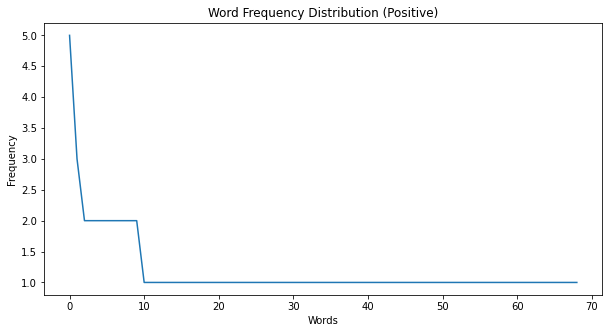

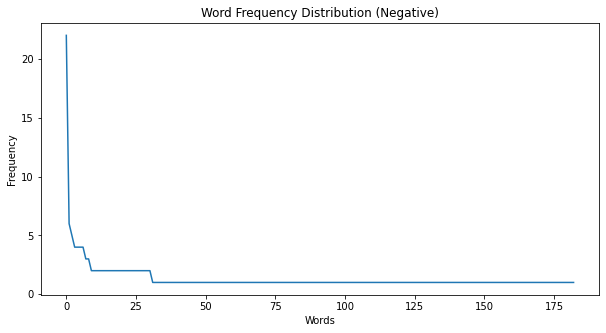

In [53]:
import nltk
import numpy

# nltk.download()

import config
import pandas as pd
import praw
import datetime as dt
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns


reddit = praw.Reddit(
    client_id=config.PERSONAL_USE_SCRIPT_14_CHARS,
    client_secret=config.SECRET_KEY_27_CHARS,
    user_agent=config.YOUR_APP_NAME,
    username=config.YOUR_REDDIT_USER_NAME,
    password=config.YOUR_REDDIT_LOGON_PASSWORD,
)

# pulling a sample of posts
posts = {"title": [], "created": []}

subreddit = "movies"
keyword = "coronavirus"

for submission in reddit.subreddit(subreddit).search(
    keyword, sort="top", time_filter="week", limit=None
):
    posts["title"].append(submission.title)
    posts["created"].append(submission.created)
    display.clear_output()
    print(len(posts))


from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pprint

sia = SIA()
results = []

for line in posts["title"]:
    pol_score = sia.polarity_scores(line)
    pol_score["Post"] = line
    results.append(pol_score)


# print(results)

df = pd.DataFrame.from_records(results)
# df.head()

# labelling dataset
df["label"] = 0
df.loc[df["compound"] >= 0.2, "label"] = 1
df.loc[df["compound"] < 0.2, "label"] = -1
# print(df.head())

# printing sample of positive posts
print("Sample of Positive Posts")
print(list(df[df["label"] == 1].Post)[:5])

# printing sample of negative posts
print("Sample of Negative Posts")
print(list(df[df["label"] == -1].Post)[:5])

# Word Distributions
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r"\w+")
stop_words = stopwords.words("english")


def process_text(posts):
    tokens = []
    for line in posts:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)

    return tokens


# Positive Words

pos_lines = list(df[df.label == 1].Post)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

# Plotting positive word frequency
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10, 5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

# Negative Words

neg_lines = list(df[df.label == -1].Post)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

# Plotting negative word frequency
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10, 5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()
